Pandas adds indexing to numpy arrays, using an object called `Series`

In [1]:
import numpy as np
import pandas as pd

random_data = np.random.randint(100, size=7)
s = pd.Series(random_data)
s

0    64
1    66
2    72
3    44
4    11
5    66
6    64
dtype: int32

In [2]:
# indexes can be specified when creating a Series and can be of any type
s = pd.Series(random_data, index=['a','b','c','d','e','f','g'])
s

a    64
b    66
c    72
d    44
e    11
f    66
g    64
dtype: int32

Accessing Series elements using the index looks just like accessing an array element.

In [3]:
# access Series element by index value
s['c']

72

In [4]:
# slicing works with non-integer indexes
s['c':'f']

c    72
d    44
e    11
f    66
dtype: int32

Because Series are numpy arrays, they support array operations.

In [5]:
# series support array operations
s + 1000

a    1064
b    1066
c    1072
d    1044
e    1011
f    1066
g    1064
dtype: int32

In [6]:
# assignment by index works (also slice assignment)
s['c'] = -100
s

a     64
b     66
c   -100
d     44
e     11
f     66
g     64
dtype: int32

In [7]:
# reordering Series retains the association between
# the index and the values
s.sort_values()

c   -100
e     11
d     44
a     64
g     64
b     66
f     66
dtype: int32

In [8]:
# you can also sort the index:
s.sort_index()

a     64
b     66
c   -100
d     44
e     11
f     66
g     64
dtype: int32

In [9]:
# you can still index with integers using iloc()
# in this case order matters
s

a     64
b     66
c   -100
d     44
e     11
f     66
g     64
dtype: int32

In [10]:
s.iloc[2]

-100

In [11]:
s_sorted = s.sort_values()
s_sorted

c   -100
e     11
d     44
a     64
g     64
b     66
f     66
dtype: int32

In [12]:
s_sorted.iloc[2]

44

Missing values are represented with `np.nan`:

In [13]:
# remember! integers can't be nans.
# unlike numpy, Pandas automatically converts the Series to float
s['c'] = np.nan
s

a    64.0
b    66.0
c     NaN
d    44.0
e    11.0
f    66.0
g    64.0
dtype: float64

In [14]:
# NaNs propagate over Series operations
# as with numpy arrays
s * 1000

a    64000.0
b    66000.0
c        NaN
d    44000.0
e    11000.0
f    66000.0
g    64000.0
dtype: float64

Series operations align on index values, not on the order of the Series. This is a powerful extension to numpy.

In [15]:
t = pd.Series([1, 0, 0, 1, 1, 0], index=['a','b','c','d','e','f'])
t = t.sort_values()
t

b    0
c    0
f    0
a    1
d    1
e    1
dtype: int64

In [16]:
u = pd.Series(np.random.randint(100,size=5), index=['a','b','c','d','e'])
u

a    59
b     7
c    71
d     2
e    30
dtype: int32

In [17]:
# this operation will align on index values.
# note that the indexes aren't quite the same, so one of the results in nan.
ut = u * t
ut

a    59.0
b     0.0
c     0.0
d     2.0
e    30.0
f     NaN
dtype: float64

In [18]:
# if you don't care about the nans, you can drop them using dropna:
ut.dropna()

a    59.0
b     0.0
c     0.0
d     2.0
e    30.0
dtype: float64

The index of a Series is an array with a dtype. It can be accessed using the `index` property:

In [19]:
u.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

Index values do not have to be unique.

In [20]:
w = pd.Series([1, 2, 3, 4, 5], index=['a','a','b','b','c'])
w

a    1
a    2
b    3
b    4
c    5
dtype: int64

In [21]:
# in which case accessing a value by a duplicated
# index value will return a Series
w['a']

a    1
a    2
dtype: int64

In [22]:
# whereas if there's only one row with a given index, pandas
# will still return just the value
# so be careful about this
w['c']

5

Series support quite a few vectorized operations, including aggregate functions.

In [23]:
# for instance, find the maximum value
w.max()

5

In [24]:
# find the index value associated with the maximum value
w.idxmax()

'c'

In [25]:
# series support string operations too
x = pd.Series(['Andy', 'Colin', 'Terry', 'Barry', 'David'])
x

0     Andy
1    Colin
2    Terry
3    Barry
4    David
dtype: object

In [26]:
x.str.upper()

0     ANDY
1    COLIN
2    TERRY
3    BARRY
4    DAVID
dtype: object

Pandas supplies a very easy to use plotting capability for Series, which handles a lot of things correctly by default, such as using index values as x axis labels.

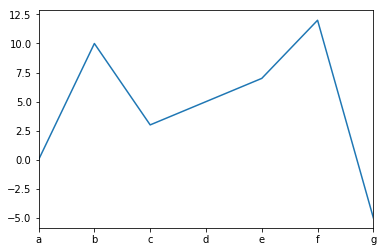

In [27]:
# series support plotting
%matplotlib inline

pd.Series([0, 10, 3, 5, 7, 12, -5], index=['a','b','c','d','e','f','g']).plot();